In [2]:
import numpy # für Arrays
import scipy.special # für Sigmoidfunktion expit()
import matplotlib.pyplot
%matplotlib inline

#Klasse des Neuronalen Netzes definieren
class neuralNetwork:
    
    #Initialisierung des Neuronalen Netzes
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #Anzahl Knoten/nodes für jeden Layer festlegen
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #Verlinkung der Gewichtematrix wih und who
        #Gewichte in den Arrays sind w_i_j, wo link aus node i und node j im nexten Layer
        # w11 w21 
        # w12 w22 etc...
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) -0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) -0.5)
        
        #Lernrate 
        self.lr = learningrate
        
        # Aktivierungsfunktion Sigmoidfunktion
        self.activation_function = lambda x: scipy.special.expit(x)
            
        pass
    
    #Training des Neuronalen Netzes
    def train(self, inputs_list, targets_list):
        
        # Konvertieren der inputs list zu 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #Kalkulation der Input-Signale in den hidden Layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #Kalkulation der Output-Signale aus dem hidden Layer mit Sigmoid Aktivierungsfunktion
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #Kalkulation der Input-Signale in den Ausgabe Layer (Final Layer)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        #Kalkulation der Output-Signale aus dem Ausgabe Layer mit Sigmoid Aktivierungsfunktion
        final_outputs = self.activation_function(final_inputs)
        
        #Fehler ist Matrix Target minus matrix Actual 
        output_errors = targets - final_outputs
        
        #Fehler des versteckten Layers ist der Output_Errrors, aufgeteilt durch Gewichte und in Versteckter Schicht aktualisiert
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #Update der Gewichte zwischen Verstecktem Layer und Ausgabe Layer
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #Update der Gewichte zwischen Input Layer und Verstecktem Layer
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #Abfrage des Neuronalen Netzes
    def query(self, inputs_list):
        
        # Konvertieren der inputs list zu 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #Kalkulation der Input-Signale in den hidden Layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #Kalkulation der Output-Signale aus dem hidden Layer mit Sigmoid Aktivierungsfunktion
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #Kalkulation der Input-Signale in den Ausgabe Layer (Final Layer)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        #Kalkulation der Output-Signale aus dem Ausgabe Layer mit Sigmoid Aktivierungsfunktion
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs 
        
        pass
    
input_nodes = 784         # 784 Farbwerte für die Pixel
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_test_10.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Training des Neural Networks

for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) /255.0 *0.99) +0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    
    pass


In [12]:
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [4]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


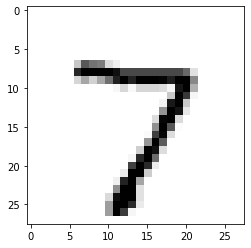

In [5]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='none')

In [6]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.0338655 ],
       [0.0586016 ],
       [0.01157413],
       [0.0282518 ],
       [0.08131462],
       [0.07073657],
       [0.03051581],
       [0.1769637 ],
       [0.01086755],
       [0.43331734]])